In [2]:
import data_structures
# import utils
# import filters
# import labeling
import pyfolio as pf
import pandas as pd

import numpy as np
import pandas as pd
import timeit
import os

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, classification_report, confusion_matrix, accuracy_score
from sklearn.utils import resample
from sklearn.utils import shuffle

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
%matplotlib inline

# import multiprocessing as mp
from multiprocess import mp_pandas_obj
from multiprocessing import cpu_count 
import multiprocessing as mp

from afml_real.finance_ml.multiprocessing import mp_pandas_obj
from afml_real.finance_ml.labeling import cusum_filter, get_t1, get_3barriers, get_bins
from afml_real.finance_ml.stats import get_daily_vol

In [3]:
data = pd.DataFrame(columns=['date_time', 'open', 'high', 'low', 'close', 'cum_vol', 'cum_dollar', 'cum_ticks'])

for i in os.listdir('C:/Users/win/Desktop/afml/dollar_bar_data_233740/'):
    dollar_bar = pd.read_csv('C:/Users/win/Desktop/afml/dollar_bar_data_233740/' + i)
    data = pd.concat([data, dollar_bar], axis=0).reset_index(drop=True)

In [4]:
data = data.sort_values(by='date_time').reset_index(drop=True)
data.index=pd.to_datetime(data['date_time'])
data = data.drop('date_time', axis=1)
data

,open,high,low,close,cum_vol,cum_dollar,cum_ticks
date_time,,,,,,,
2018-09-17 09:00:30.513028,18390.0,18395.0,18390.0,18395.0,1787,32869550.0,9
2018-09-17 09:00:34.830220,18395.0,18395.0,18385.0,18390.0,3344,61491455.0,17
2018-09-17 09:00:34.830627,18390.0,18390.0,18390.0,18390.0,2001,36798390.0,1
2018-09-17 09:00:34.832177,18390.0,18390.0,18390.0,18390.0,1666,30637740.0,2
2018-09-17 09:00:34.839976,18390.0,18390.0,18390.0,18390.0,2450,45055500.0,6
2018-09-17 09:00:38.930152,18390.0,18390.0,18385.0,18390.0,2504,46041045.0,17
2018-09-17 09:00:40.922695,18390.0,18390.0,18390.0,18390.0,2200,40458000.0,7
2018-09-17 09:00:40.923000,18390.0,18390.0,18390.0,18390.0,1912,35161680.0,1
2018-09-17 09:00:45.622285,18390.0,18390.0,18385.0,18385.0,2037,37456405.0,21


In [8]:
data = data[:10000]

In [9]:
data

,open,high,low,close,cum_vol,cum_dollar,cum_ticks
date_time,,,,,,,
2018-09-17 09:00:30.513028,18390.0,18395.0,18390.0,18395.0,1787,32869550.0,9
2018-09-17 09:00:34.830220,18395.0,18395.0,18385.0,18390.0,3344,61491455.0,17
2018-09-17 09:00:34.830627,18390.0,18390.0,18390.0,18390.0,2001,36798390.0,1
2018-09-17 09:00:34.832177,18390.0,18390.0,18390.0,18390.0,1666,30637740.0,2
2018-09-17 09:00:34.839976,18390.0,18390.0,18390.0,18390.0,2450,45055500.0,6
2018-09-17 09:00:38.930152,18390.0,18390.0,18385.0,18390.0,2504,46041045.0,17
2018-09-17 09:00:40.922695,18390.0,18390.0,18390.0,18390.0,2200,40458000.0,7
2018-09-17 09:00:40.923000,18390.0,18390.0,18390.0,18390.0,1912,35161680.0,1
2018-09-17 09:00:45.622285,18390.0,18390.0,18385.0,18385.0,2037,37456405.0,21


In [10]:
close = data['close']
vol = get_daily_vol(close)
sampled_idx = cusum_filter(close, vol)
t1 = get_t1(close, sampled_idx, num_days=1)
trgt = vol

In [11]:
events = get_3barriers(close, t_events=sampled_idx, trgt=trgt, ptsl=1, t1=t1)
events.head()

C:\Users\win\afml_real\finance_ml\labeling\barriers.py:65: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  trgt = trgt.loc[t_events]


,t1,trgt
2018-09-17 09:00:45.622285,2018-09-17 09:00:46.456111,0.000192
2018-09-17 09:00:56.525575,2018-09-17 09:01:00.610792,0.000149
2018-09-17 09:01:03.060738,2018-09-17 09:01:05.324678,0.000224
2018-09-17 09:01:09.191304,2018-09-17 09:01:13.594156,0.000497
2018-09-17 09:01:13.594156,2018-09-17 09:01:17.177294,0.000463


In [13]:
def get_num_co_events(close_idx, t1, molecule):
    # Find events that span the period defined by molecule
    t1 = t1.fillna(close_idx[-1])
    t1 = t1[t1 >= molecule[0]]
    t1 = t1.loc[:t1[molecule].max()]
    # Count the events
    iloc = close_idx.searchsorted(np.array([t1.index[0], t1.max()]))
    count = pd.Series(0, index=close_idx[iloc[0]: iloc[1] + 1])
    for t_in, t_out in t1.iteritems():
        count.loc[t_in: t_out] += 1
    return count.loc[molecule[0]: t1[molecule].max()]

In [14]:
num_threads = 1
num_co_events = mp_pandas_obj(get_num_co_events,
                              ('molecule', events.index),
                              num_threads,
                              close_idx=close.index,
                              t1=events['t1'])

In [18]:
num_co_events

2018-09-17 09:00:45.622285    1
2018-09-17 09:00:46.456111    1
2018-09-17 09:00:46.456962    0
2018-09-17 09:00:46.459664    0
2018-09-17 09:00:48.798575    0
2018-09-17 09:00:49.803140    0
2018-09-17 09:00:49.815040    0
2018-09-17 09:00:50.500233    0
2018-09-17 09:00:50.944076    0
2018-09-17 09:00:51.512151    0
2018-09-17 09:00:51.513155    0
2018-09-17 09:00:51.513611    0
2018-09-17 09:00:52.502753    0
2018-09-17 09:00:56.525575    1
2018-09-17 09:01:00.610792    1
2018-09-17 09:01:01.200232    0
2018-09-17 09:01:01.201106    0
2018-09-17 09:01:01.380472    0
2018-09-17 09:01:03.060738    1
2018-09-17 09:01:05.324678    1
2018-09-17 09:01:06.258755    0
2018-09-17 09:01:09.191304    1
2018-09-17 09:01:10.652256    1
2018-09-17 09:01:13.594156    2
2018-09-17 09:01:17.012963    2
2018-09-17 09:01:17.177294    2
2018-09-17 09:01:17.346604    1
2018-09-17 09:01:19.423711    1
2018-09-17 09:01:21.320987    1
2018-09-17 09:01:21.328977    0
                             ..
2018-09-

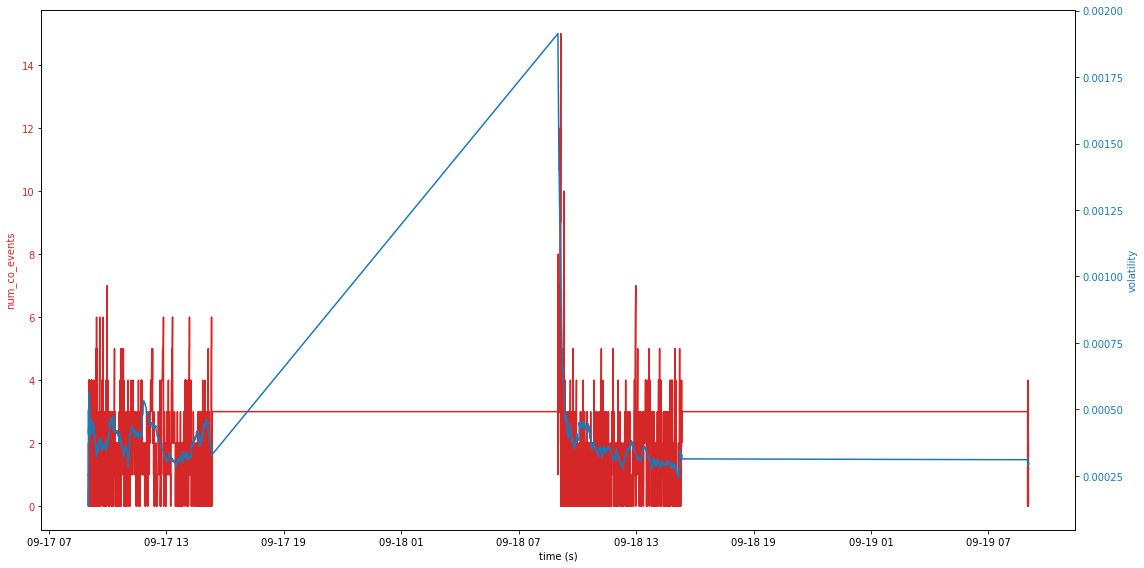

In [19]:
fig, ax1 = plt.subplots(figsize=(16, 8))

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('num_co_events', color=color)
ax1.plot(num_co_events, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('volatility', color=color)  # we already handled the x-label with ax1
ax2.plot(vol, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

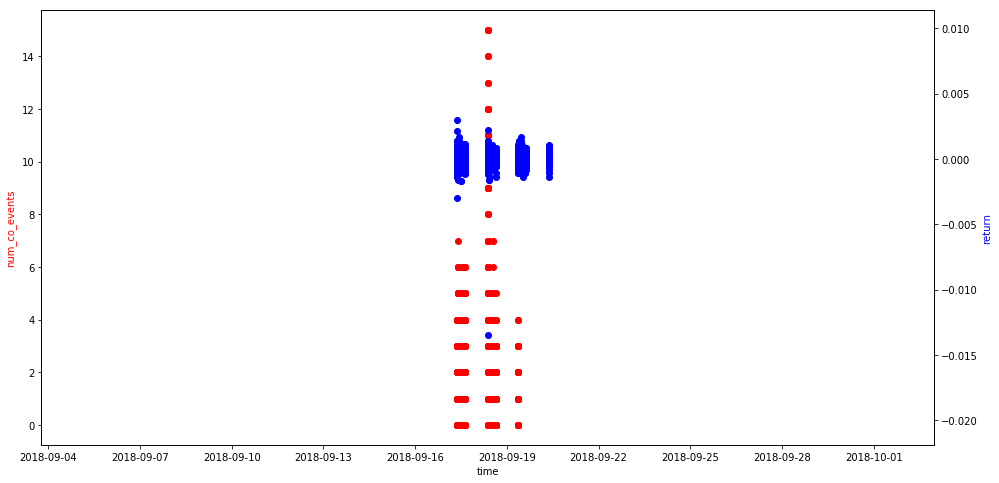

In [20]:
fig, ax1 = plt.subplots(figsize=(16, 8))

color = 'red'
ax1.set_xlabel('time')
ax1.set_ylabel('num_co_events', color=color)
ax1.scatter(num_co_events.index, num_co_events.values, color=color)

ax2 = ax1.twinx()

color = 'blue'
ret = close.pct_change().dropna()
ax2.set_ylabel('return', color=color)
ax2.scatter(ret.index, ret.values, color=color)

In [21]:
def get_ind_matrix(bar_idx, t1):
    ind_m = pd.DataFrame(0, index=bar_idx,
                         columns=range(t1.shape[0]))
    for  i, (t0_, t1_) in enumerate(t1.iteritems()):
        ind_m.loc[t0_:t1_, i] = 1
    return ind_m

def get_avg_uniq(ind_m, c=None):
    if c is None:
        c = ind_m.sum(axis=1)
    ind_m = ind_m.loc[c > 0]
    c = c.loc[c > 0]
    u = ind_m.div(c, axis=0)
    avg_u = u[u>0].mean()
    avg_u = avg_u.fillna(0)
    return avg_u

In [22]:
ind_m = pd.DataFrame(0, index=close.index, columns=range(events['t1'].shape[0]))
ind_m.shape

(10000, 1771)

In [23]:
ind_m = get_ind_matrix(close.index, events['t1'])

In [24]:
avg_uniq = get_avg_uniq(ind_m)

In [25]:
avg_uniq.head()

0    1.000000
1    1.000000
2    1.000000
3    0.833333
4    0.500000
dtype: float64

In [26]:
def seq_bootstrap(ind_m, s_length=None):
    if s_length is None:
        s_length = ind_m.shape[1]
    phi = []
    while len(phi) < s_length:
        c = ind_m[phi].sum(axis=1) + 1
        avg_u = get_avg_uniq(ind_m, c)
        prob = (avg_u / avg_u.sum()).values
        phi += [np.random.choice(ind_m.columns, p=prob)]
    return phi

In [27]:
phi = seq_bootstrap(ind_m)
print(phi)

[1090, 1281, 1471, 482, 1418, 667, 42, 544, 435, 506, 424, 998, 1730, 700, 1679, 785, 717, 167, 1328, 937, 1447, 570, 504, 1229, 964, 103, 1302, 348, 1199, 1291, 831, 1514, 1461, 474, 399, 1158, 1710, 1111, 675, 1766, 134, 1557, 986, 986, 1106, 267, 1189, 1657, 333, 425, 883, 899, 753, 265, 7, 313, 1150, 1560, 143, 982, 740, 63, 656, 211, 499, 1619, 1044, 703, 1669, 134, 363, 795, 1504, 1688, 943, 1309, 1116, 1061, 1096, 141, 634, 347, 965, 1026, 220, 1740, 1409, 1368, 1379, 1175, 4, 307, 138, 307, 1088, 641, 1240, 1314, 1550, 218, 1223, 91, 839, 653, 23, 1125, 1360, 329, 177, 633, 868, 542, 730, 1115, 1724, 1249, 788, 1638, 294, 208, 860, 1687, 1710, 1603, 31, 1162, 941, 1374, 461, 1393, 1482, 1363, 1484, 1011, 264, 1541, 857, 380, 152, 90, 1102, 1313, 614, 897, 1696, 987, 770, 906, 1530, 1490, 1596, 371, 1466, 59, 1307, 997, 1103, 1248, 143, 1435, 1202, 1729, 33, 858, 920, 1644, 1424, 196, 1564, 79, 1472, 234, 967, 1412, 1035, 161, 387, 543, 285, 1548, 1053, 1210, 102, 1760, 232, 391

In [29]:
# def get_time_decay(tw, last_w=1., truncate=0, is_exp=False):
#     cum_w = tw.sort_index().cumsum()
#     init_w = 1.
#     if is_exp:
#         init_w = np.log(init_w)
#     if last_w >= 0:
#         if is_exp:
#             last_w = np.log(last_w)
#         slope = (init_w - last_w) / cum_w.iloc[-1]
#     else:
#         slope = init_w / ((last_w + 1) * cum_w.iloc[-1])
#     const = init_w - slope * cum_w.iloc[-1]
#     weights = const + slope * cum_w
#     if is_exp:
#         weights =np.exp(weights)
#     weights[weights < truncate] = 0
#     return weights

# def get_sample_tw(t1, num_co_events, molecule):
#     wght = pd.Series(index=molecule)
#     for t_in, t_out in t1.loc[wght.index].iteritems():
#         wght.loc[t_in] = (1. / num_co_events.loc[t_in: t_out]).mean()
#     return wght

In [30]:
num_co_events = num_co_events.loc[~num_co_events.index.duplicated(keep='last')]
num_co_events = num_co_events.reindex(close.index).fillna(0)
# tw = mp_pandas_obj(get_sample_tw,
#                    ('molecule', events.index),
#                    num_threads,
#                    t1=events['t1'],
#                    num_co_events=num_co_events)

In [ ]:
# tw

## Average uniqueness of a label 
## Sample weight by absolute return attribution

In [56]:
def mpSampleTW(t1,numCoEvents,molecule):
    # Derive avg. uniqueness over the events lifespan
    wght=pd.Series(index=molecule)
    for tIn,tOut in t1.loc[wght.index].iteritems():
        wght.loc[tIn]=(1./numCoEvents.loc[tIn:tOut]).mean()
    return wght

In [57]:
def mpSampleW(t1,numCoEvents,close,molecule):
    # Derive sample weight by return attribution
    ret=np.log(close).diff() # log-returns, so that they are additive
    wght=pd.Series(index=molecule)
    for tIn,tOut in t1.loc[wght.index].iteritems():
        wght.loc[tIn]=(ret.loc[tIn:tOut]/numCoEvents.loc[tIn:tOut]).sum()
    return wght.abs()

In [59]:
out = pd.DataFrame()

out['tW'] = mp_pandas_obj(mpSampleTW,
                   ('molecule', events.index),
                   num_threads,
                   t1=events['t1'],
                   numCoEvents=num_co_events)

In [61]:
out['w'] = mp_pandas_obj(mpSampleW,
                   ('molecule', events.index),
                   num_threads,
                   t1=events['t1'],
                   numCoEvents=num_co_events, 
                   close=close)

In [62]:
out['w'] *= out.shape[0]/out['w'].sum()

In [64]:
print(out)

                                  tW         w
2018-09-17 09:00:45.622285  1.000000  0.701217
2018-09-17 09:00:56.525575  1.000000  0.000000
2018-09-17 09:01:03.060738  1.000000  4.205588
2018-09-17 09:01:09.191304  0.833333  4.203399
2018-09-17 09:01:13.594156  0.500000  1.402625
2018-09-17 09:01:17.012963  0.800000  1.403293
2018-09-17 09:01:27.080180  1.000000  0.702171
2018-09-17 09:01:38.324982  0.557692  0.701805
2018-09-17 09:01:46.475615  0.361111  0.701965
2018-09-17 09:01:58.077183  0.270833  0.117013
2018-09-17 09:02:01.389785  0.283333  0.585000
2018-09-17 09:02:26.194241  1.000000  4.919219
2018-09-17 09:02:46.936069  0.571429  4.925546
2018-09-17 09:02:54.336751  0.500000  1.406066
2018-09-17 09:02:55.791554  1.000000  1.403006
2018-09-17 09:03:05.320181  0.597222  2.167565
2018-09-17 09:03:09.173043  0.341667  1.171482
2018-09-17 09:03:12.980004  0.291667  0.292906
2018-09-17 09:03:21.067292  0.297619  1.054262
2018-09-17 09:03:31.659051  0.305556  0.526916
2018-09-17 09

C:\Users\Jay\lib\site-packages\pandas\plotting\_core.py:1804: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


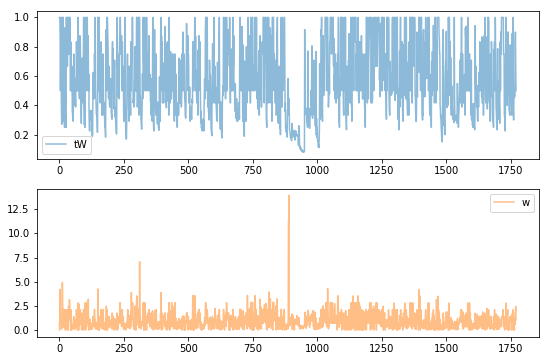

In [65]:
fig, ax = plt.subplots(figsize=(9,6))
out.reset_index(drop=True).plot(subplots=True, alpha=0.5, ax=ax);

In [32]:
# exp_decay = get_time_decay(tw, last_w=.1, is_exp=True)
# exp_decay.head()

2018-09-17 09:00:45.622285    0.100225
2018-09-17 09:00:56.525575    0.100451
2018-09-17 09:01:03.060738    0.100677
2018-09-17 09:01:09.191304    0.100866
2018-09-17 09:01:13.594156    0.100980
dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [34]:
Xy = (pd.DataFrame()
      .assign(close=close,
              close_lag=close.shift(1))
     ).dropna()

In [36]:
y = Xy.loc[:, 'close'].values
X = Xy.loc[:, 'close_lag'].values.reshape(-1, 1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    shuffle=False)

In [41]:
n_estimator = 50; RANDOM_STATE=777
rf = RandomForestRegressor(max_depth=1, n_estimators=n_estimator,
                           criterion='mse', oob_score=True,
                           random_state=RANDOM_STATE)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=1,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=True, random_state=777, verbose=0, warm_start=False)

In [42]:
rf.oob_score_

0.7198259697684078

In [52]:
from sklearn.model_selection import cross_validate

n_estimator = 50
rf = RandomForestRegressor(max_depth=1, n_estimators=n_estimator,
                           criterion='mse', oob_score=True,
                           random_state=RANDOM_STATE)

scores = cross_validate(rf, X, y, cv=5, return_train_score='True')

In [54]:
scores

{'fit_time': array([0.05186844, 0.04986644, 0.04884195, 0.04986405, 0.04827046]),
 'score_time': array([0.00199199, 0.00198936, 0.00201702, 0.00199175, 0.00199413]),
 'test_score': array([ 0.32560155, -0.97289521, -0.16329412,  0.09576862,  0.6966881 ]),
 'train_score': array([0.71895379, 0.74641515, 0.6773669 , 0.69782486, 0.68774099])}

In [70]:
def getExTimeDecay(tW,clfLastW=1.,exponent=1):
    # apply exponential decay to observed uniqueness (tW)
    # newest observation gets weight=1, oldest observation gets weight=clfLastW
    clfW=tW.sort_index().cumsum()
    if clfLastW>=0: slope=((1.-clfLastW)/clfW.iloc[-1])**exponent
    else: slope=(1./((clfLastW+1)*clfW.iloc[-1]))**exponent
    const=1.-slope*clfW.iloc[-1]
    clfW=const+slope*clfW
    clfW[clfW<0]=0
    print(round(const,4), round(slope,4))
    return clfW

1.0 0.0
-0.9996 0.002
-2.363 0.0033
-4.6558 0.0055
-6.0178 0.0069
-8.5119 0.0093


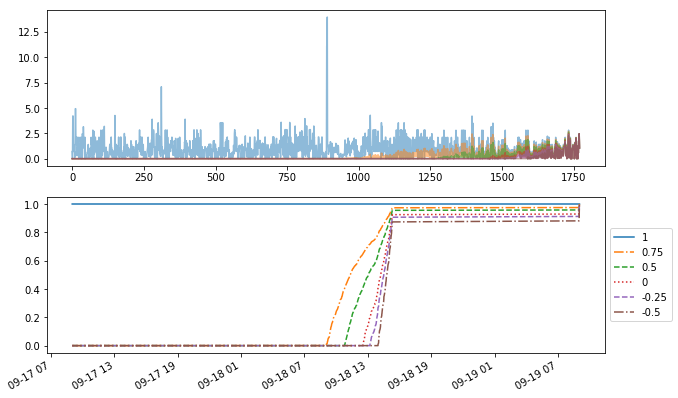

In [71]:
f,ax=plt.subplots(2,figsize=(10,7))
fs = [1,.75,.5,0,-.25,-.5]
ls = ['-','-.','--',':','--','-.']
for lstW, l in zip(fs,ls):
    decayFactor = getExTimeDecay(out['tW'].dropna(), 
                                 clfLastW=lstW,
                                 exponent=0.75) # experiment by changing exponent
    ((out['w'].dropna()*decayFactor).reset_index(drop=True)
     .plot(ax=ax[0],alpha=0.5))
    s = (pd.Series(1,index=out['w'].dropna().index)*decayFactor)
    s.plot(ax=ax[1], ls=l, label=str(lstW))
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [72]:
def seqBootstrap(indM,sLength=None):
    # Generate a sample via sequential bootstrap
    if sLength is None:sLength=indM.shape[1]
    phi=[]
    while len(phi)<sLength:
        avgU=pd.Series()
        for i in indM:
            indM_=indM[phi+[i]] # reduce indM
            avgU.loc[i]=getAvgUniqueness(indM_).iloc[-1]
        prob=avgU/avgU.sum() # draw prob
        phi+=[np.random.choice(indM.columns,p=prob)]
    return phi

In [76]:
def getAvgUniqueness(indM):
    # Average uniqueness from indicator matrix
    c=indM.sum(axis=1) # concurrency
    u=indM.div(c,axis=0) # uniqueness
    avgU=u[u>0].mean() # avg. uniqueness
    return avgU

In [ ]:
def main():
    
    np.random.seed(12121) # fix seed as results are unstable
    t1=pd.Series([2,3,5],index=[0,2,4]) # t0,t1 for each feature obs
    barIx=range(t1.max()+1) # index of bars
    indM=ind_m
    phi_random=np.random.choice(indM.columns,size=indM.shape[1])
    print(phi_random)
    print(f'Standard uniqueness: {getAvgUniqueness(indM[phi_random]).mean():.4f}')
    phi_seq=seqBootstrap(indM)
    print(phi_seq)
    print(f'Sequential uniqueness: {snp.getAvgUniqueness(indM[phi_seq]).mean():.4f}')
    
main()

[1238  158 1366 ... 1418 1713 1253]
Standard uniqueness: 0.4402


In [ ]:
np.random.seed(12121)
phi_random = np.random.choice(ind_m.columns, size=ind_m.shape[1])
print(phi_random)
phi_seq = seqBootstrop(ind_m)
print(phi_seq)